In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_synthetic_data():
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)
    return X, y

In [3]:
def lasso_regression(X, y, alpha, epochs, learning_rate):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    for epoch in range(epochs):
        gradient = (2/m) * X.T.dot(X.dot(theta) - y) + alpha * np.sign(theta)
        thera = theta - learning_rate * gradient
    return theta

In [4]:
def ridge_regression(X, y, alpha, epochs, learning_rate):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    for epoch in range(epochs):
        gradient = (2/m) * X.T.dot(X.dot(theta) - y) + 2 * alpha * theta
        thera = theta - learning_rate * gradient
    return theta

In [5]:
def elastic_net_regression(X, y, alpha, l1_ratio, epochs, learning_rate):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    for epoch in range(epochs):
        gradient = (2/m) * X.T.dot(X.dot(theta) - y) + alpha * (l1_ratio * np.sign(theta) + (1 - l1_ratio) * 2 * theta)
        thera = theta - learning_rate * gradient
    return theta

In [6]:
def calculate_mse(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    mse = np.sum((y_pred - y) ** 2)/m
    return mse

In [7]:
def plot_regression(X, y, theta, title):
    plt.scatter(X, y, label='Data')
    X_range = np.linspace(0,2, 100).reshape(-1,1)
    X_range_poly = np.c_[np.ones((100, 1)), X_range]
    y_pred = X_range_poly.dot(theta)
    plt.plot(X_range, y_pred, label="Regression Line", color='Red')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
    

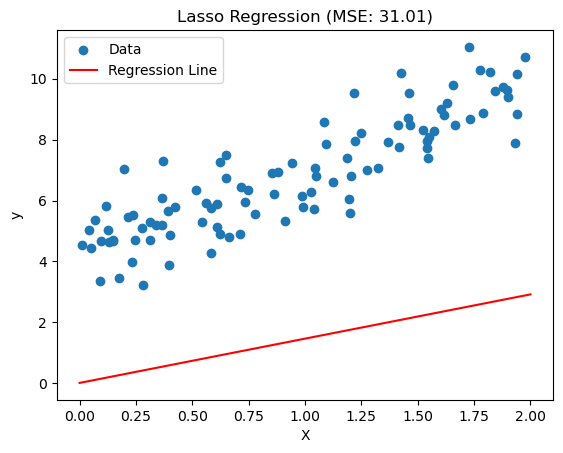

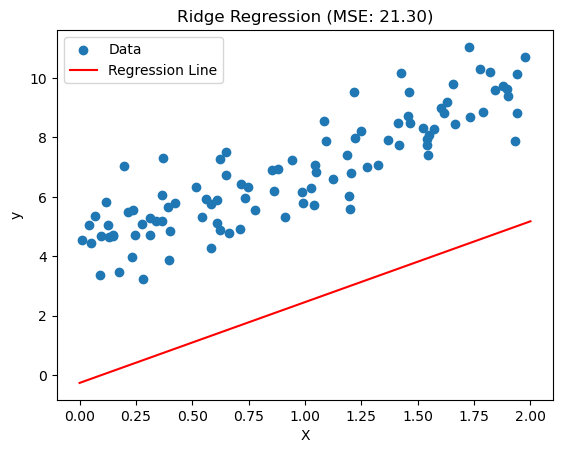

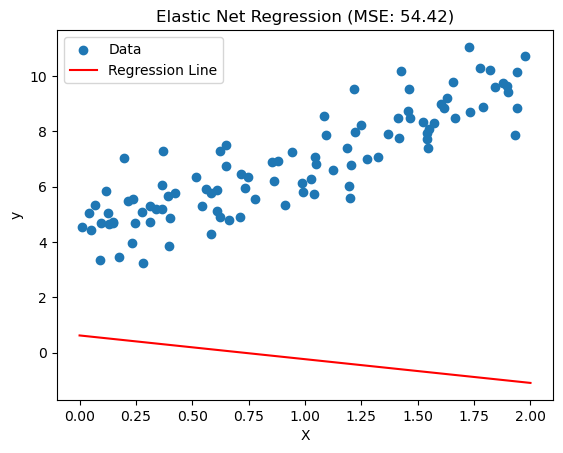

In [8]:
def main():
    #Generate Data
    X, y = generate_synthetic_data()
    X_poly = np.c_[np.ones((100, 1)), X]
    
    #Hyperparams
    alpha = 0.1
    l1_ratio = 0.5
    epochs = 1000
    learning_rate = 0.1
    
    #Lasso Regression
    theta_lasso = lasso_regression(X_poly, y, alpha, epochs, learning_rate)
    mse_lasso = calculate_mse(X_poly, y, theta_lasso)
    plot_regression(X, y, theta_lasso, f'Lasso Regression (MSE: {mse_lasso:.2f})')
    
    #Ridge Regression
    theta_ridge = ridge_regression(X_poly, y, alpha, epochs, learning_rate)
    mse_ridge = calculate_mse(X_poly, y, theta_ridge)
    plot_regression(X, y, theta_ridge, f'Ridge Regression (MSE: {mse_ridge:.2f})')
    
    #Elastic Net Regression
    theta_en = elastic_net_regression(X_poly, y, alpha, l1_ratio, epochs, learning_rate)
    mse_es = calculate_mse(X_poly, y, theta_en)
    plot_regression(X, y, theta_en, f'Elastic Net Regression (MSE: {mse_es:.2f})')
    
    
if __name__ == "__main__":
    main()

## using sklearn

In [9]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
#Genarate the synthetic data
np.random.seed(1)
X = 2 * np.random.rand(100,1)
y = 0.5 * X + np.random.randn(100, 1)/1.5

In [12]:
#Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

In [14]:
#Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

In [15]:
#ElasticNet Regression
en_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
en_model.fit(X_train, y_train)
en_pred = en_model.predict(X_test)

Lasso MSE: 0.4051649344037279
Ridge MSE: 0.32256064648026905
ElasticNet MSE: 0.3646702119740145


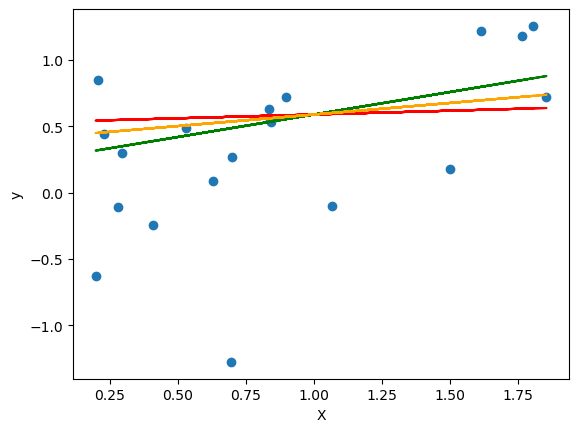

In [16]:
#Evaluate the models
print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))
print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))
print("ElasticNet MSE:", mean_squared_error(y_test, en_pred))

#Visualize the Result
plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_test, lasso_pred, label="Lasso", color='red')
plt.plot(X_test, ridge_pred, label="Ridge", color='green')
plt.plot(X_test, en_pred, label="ElasticNet", color='orange')
plt.xlabel("X")
plt.ylabel("y")
plt.show()